# Индивидуальное задание 1

> Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения линейного графика.

Определить мгновенный ток в индуктивном элементе $L=0.1Гн$, построить векторные и временные диаграммы тока и напряжения, если напряжение на индуктивном элементе $u = 20sin(10^3 t - 30^0)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
%matplotlib inline

Запишем известные переменные. Из уравнения напряжения на индуктивном элементе определим значения амплитуды напряжения $U_m$, угловой частоты $ω$ и фазы $Ψ_u$.

In [2]:
L = 0.1
Um = 20
ω = pow(10, 3)
Ψu = np.radians(-30)

Определим комплексную амплитуду напряжения $\underline{U_{m}} = U_{m}e^{j Ψ_{u}}$

In [3]:
_Um = Um * cm.exp(1j * Ψu)
print(f"Комплексная амплитуда напряжения: {_Um}")

Комплексная амплитуда напряжения: (17.320508075688775-9.999999999999998j)


Определим комплексное сопротивление индуктивного элемента $\underline{Z} = jωL$

In [4]:
_Z = 1j * ω * L
print(f"Комплексное сопротивление: {_Z}")

Комплексное сопротивление: 100j


По закону Ома находим комплексную амплитуду тока в индуктивном  элементе $\underline{I_m} = \frac{\underline{U_m}}{\underline{Z}}$

In [5]:
_Im = _Um / _Z
print(f"Комплексная амплитуда тока: {_Im}")

Комплексная амплитуда тока: (-0.09999999999999998-0.17320508075688776j)


Определим значения амплитуды тока $I_m$ и фазы $Ψ_i$.

In [6]:
Ψi = round(np.degrees(cm.phase(_Im)))
print(f"Фаза тока Ψi = {Ψi}°")

Фаза тока Ψi = -120°


In [7]:
Im = abs(_Im)
print(f"Амплитуда тока Im = {Im} A")

Амплитуда тока Im = 0.2 A


Строим векторную диаграмму

Выбираем масштабные множители

In [8]:
mu = 5
mi = 0.1

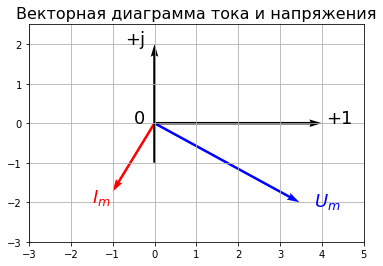

In [9]:
fig, ax = plt.subplots()
ax.quiver([0, 0], [0, 0], [_Um.real / mu, _Im.real / mi], 
          [_Um.imag / mu, _Im.imag / mi], color=['blue', 'red'], 
          angles='xy', scale_units='xy', scale=1)
ax.quiver([0, 0], [-1, 0], [0, 4], [3, 0], angles='xy', 
          scale_units='xy', scale=1)

plt.xlim(-3,5)
plt.ylim(-3,2.5)

ax.text(-1.5, -2, r'$I_m$', color='red', fontsize=18)
ax.text(3.8, -2.1, r'$U_m$', color='blue', fontsize=18)
ax.text(-0.5, 0, '0', fontsize=18)

ax.text(-0.7, 2, '+j', fontsize=18)
ax.text(4.1, 0, '+1', fontsize=18)

ax.set_title("Векторная диаграмма тока и напряжения", fontsize=16)

ax.grid()
plt.show()

Строим временные диаграммы тока и напряжения

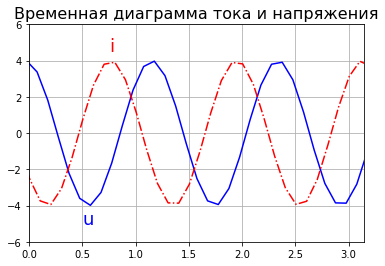

In [10]:
fig, ax = plt.subplots()

x1 = np.arange(Ψu, 5, 0.1)
y1 = Um / mu * np.sin(ω * x1)
x2 = np.arange(np.radians(Ψi), 5, 0.1)
y2 = Im / 0.05 *np.sin(ω * x2)

ax.plot(x1, y1, '-b')
ax.plot(x2, y2, '-.r')

plt.xlim(0, cm.pi)
plt.ylim(-6, 6)

ax.text(0.75, 4.5, 'i', color='red', fontsize=18)
ax.text(0.5, -5, 'u', color='blue', fontsize=18)

ax.set_title("Временная диаграмма тока и напряжения", fontsize=16)

ax.grid()
plt.show()